# Day 24:Regression Model Evaluation Metrics in Python - Key metrics for evaluating regression models.

Math Focus: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.
- **Theoretical Concepts:**
    - Importance of model evaluation in regression analysis.
    - Overview of key metrics: MSE, RMSE, and R-squared.
- **Mathematical Foundation:**
    - Formulas and interpretation of MSE, RMSE, and R-squared.
    - Understanding the significance of these metrics in model performance.
- **Python Implementation:**
    - Calculating MSE, RMSE, and R-squared using scikit-learn.
    - Visualizing residuals to understand model performance.
- **Example Dataset:**
    - Use datasets from previous lessons for consistency in evaluation.


## Introduction
In regression analysis, it's essential to evaluate a model's performance to understand its predictive accuracy and to identify opportunities for enhancement. Critical metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared ($R^2$) provide valuable insights into the model's prediction quality by comparing the predicted outcomes against actual events. Here's an intuitive introduction of these metrics:

- **Mean Squared Error (MSE)** offers a measure of the average squared difference between the actual outcomes and the predictions made by the model. Simply put, it quantifies the average magnitude of the model's errors. A high MSE indicates that the model's predictions are far off from the actual values, which could be a result of an oversimplified model failing to capture the complexity of the data.

- **Root Mean Squared Error (RMSE)** similarly measures the average error magnitude but brings it back to the same unit as the outcome variable. It offers a more digestible snapshot of the model's performance by directly relating to the variable being predicted. A model with high RMSE has not only failed to accurately predict the outcomes but also struggles with consistency in its predictions across the dataset.

- **R-Squared ($R^2$)** contrasts the model's predictions with a very simple model that only uses the mean of the actual outcomes for predictions. It tells us how much of the variation in the dependent variable can be explained by the model's independent variables. A value near 1 indicates a strong model that closely matches the observed data, while a value near 0 suggests the model performs no better than a naive model. However, $R^2$ alone can be misleading, especially in cases with high variance or when the model is overly complex, leading to overfitting.

Different scenarios can influence these metrics and their reflection of a model's performance. For instance, outlier data points can significantly skew MSE and RMSE, suggesting poor model performance even if the model is generally accurate for the majority of cases. Conversely, a high $R^2$ might not always denote a superior model, as it can result from overfitting, where the model learns the noise in the training data instead of the underlying trend, therefore performing poorly on unseen data.

Let's review these individually and test some models with `sklearn`.

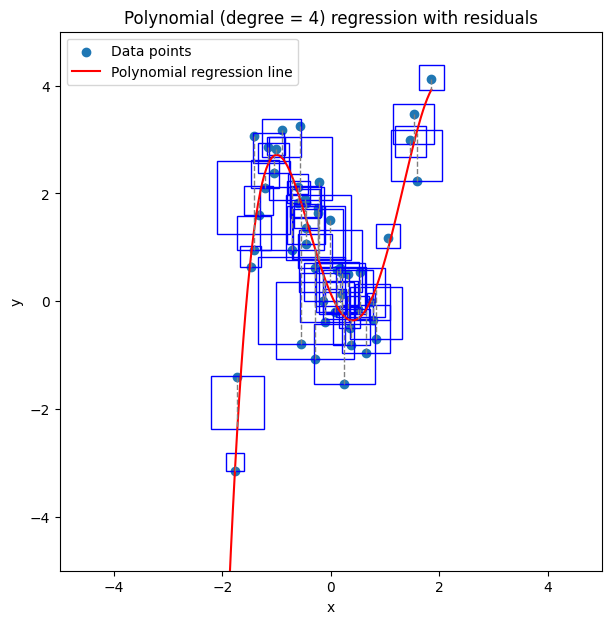

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generating demo data
np.random.seed(42)
x = np.random.normal(0, 1, 50)
X = x[:, np.newaxis]
y = -0.8 * x**4 + 1.4 * x**3 + 2.6 * x**2 - 2.5 * x + np.random.normal(0, 1, 50)
y = y[:, np.newaxis]

degree = 4  # The degree of the polynomial
poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly.fit(X, y)

# Generating points for plotting the regression line
x_plot = np.linspace(min(X), max(X), 100)
y_plot = poly.predict(x_plot)

# Predicting with the model for the original data points
y_pred = poly.predict(X)

plt.figure(figsize=(7,7))

plt.scatter(X, y, label='Data points')
plt.plot(x_plot, y_plot, color='red', label='Polynomial regression line')

# Drawing residuals
for xi, yi, ypi in zip(X, y, y_pred):
    plt.vlines(xi, yi, ypi, color='gray', linestyle='--', linewidth=1)
    # Drawing squares for the MSE visualization
    if yi > ypi:
        # If the actual value is greater, our square's bottom-left coordinates start at the predicted value
        square_bottom_left_x = xi - (np.sqrt(abs(yi-ypi))/2)
        square_bottom_left_y = ypi
    else:
        # If the predicted value is greater, our square's bottom-left coordinates start at the actual value
        square_bottom_left_x = xi - (np.sqrt(abs(yi-ypi))/2)
        square_bottom_left_y = yi
    square_height = np.sqrt(abs(yi-ypi))
    square_width = square_height
    # The 'width' and 'height' parameters are the size's sides of the square
    plt.gca().add_patch(plt.Rectangle((square_bottom_left_x, square_bottom_left_y), square_width, square_height, fill=None, edgecolor='blue', linewidth=1))

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial (degree = 4) regression with residuals')
axes = plt.gca()
axes.set_xlim([-5,5])
axes.set_ylim([-5,5])
plt.show()

the grey dashed lines on this plot are the residuals - the difference between the predicted value (the regression line) and the actual value (that X value's label from training data).

The blue squares have a length and width equal to the residual.
* The average area of a square is the MSE.
* The average length of a square is the RMSE.
* $R^2$ is a comparison between these squares and the squares that a straight line through the mean Y-value would form.

## Mean Squared Error (MSE)
The **Mean Squared Error (MSE)** is a widely used metric for evaluating the performance of a regression model. It quantifies the average squared difference between the actual observed values and the values predicted by the model. The principle behind MSE is straightforward: it assesses the quality of a model by averaging the squares of the errors, ensuring that larger errors are given disproportionately more weight than smaller errors, thus emphasizing the importance of closer predictions. The mathematical formula to calculate MSE is given by:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i - \hat{Y_i})^2$$

In this equation, $n$ represents the total number of observations in the dataset, $Y_i$ denotes the actual values of the dependent variable, and $\hat{Y_i}$ signifies the predicted values generated by the regression model. A lower MSE value indicates a model that accurately predicts the outcome variable, while a higher MSE value suggests a model that poorly predicts the outcome variable. Understanding and minimizing the MSE is essential in improving the accuracy and predictive performance of regression models.

In [3]:
# Educational purposes only. For large datasets, this naive (R)MSE implementation is likely to perform very badly.
def calculate_mse(y_true, y_pred):
    """
    Calculate the mean squared error between the true values and the predicted values.
    
    :param y_true: The actual values (numpy array).
    :param y_pred: The predicted values (numpy array).
    :return: The mean squared error.
    """
    n = len(y_true)  # Number of data points
    mse = sum((y_true[i] - y_pred[i])**2 for i in range(n)) / n  # Summing the squared differences and dividing by n
    return mse


mse_by_hand = calculate_mse(y, y_pred) # using y and y_pred from the introductory plot

print("Mean Squared Error:", mse_by_hand)

Mean Squared Error: [0.73102773]


In [2]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred) # using y and y_pred from the introductory plot

print("Mean Squared Error:", mse)

Mean Squared Error: 0.7310277298281567


## Root Mean Squared Error (RMSE)
- **Root Mean Squared Error (RMSE)** takes the square root of the MSE, thereby converting the units back to the original units of the target variable. This adjustment makes RMSE an easily interpretable metric that represents the average distance between the predicted values and the actual values. The formula for calculating RMSE is:
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(Y_i - \hat{Y_i})^2}$$
In this formula, $n$ represents the total number of observations, $Y_i$ specifies the actual value for the ith observation, and $\hat{Y_i}$ denotes the predicted value from the model for the ith observation. RMSE provides a straightforward measure of the average magnitude of the model's prediction errors, making it a crucial metric for evaluating the precision of regression models.

`sklearn` does not provide a dedicated RMSE function - just use `numpy`'s `sqrt` function on the MSE.

In [4]:
# Educational purposes only. For large datasets, this naive (R)MSE implementation is likely to perform very badly.
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mse)  # Taking the square root of MSE

rmse = calculate_rmse(y, y_pred) # using y and y_pred from the introductory plot
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.8550015963892446


In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y, y_pred)) # using y and y_pred from the introductory plot

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.8550015963892446


## R-Squared ($R^2$)
- **R-squared ($R^2$)**, also known as the coefficient of determination, quantifies the fraction of the total variation in the dependent variable that is captured by the independent variable(s) in the regression model. In essence, it provides a measure of how well the observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model. The $R^2$ value ranges from 0 to 1, where a value of 0 indicates that the model explains none of the variability of the response data around its mean, and a value of 1 indicates that the model explains all the variability of the response data around its mean. Thus, a higher $R^2$ value indicates a better fit of the model to the data.

The formula for calculating $R^2$ is given by:
$$R^2 = 1 - \frac{\sum_{i=1}^{n}(Y_i - \hat{Y_i})^2}{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}$$
where $\sum_{i=1}^{n}(Y_i - \hat{Y_i})^2$ is the sum of squares of the residuals, $\sum_{i=1}^{n}(Y_i - \bar{Y})^2$ is the total sum of squares, $Y_i$ are the actual observed values, $\hat{Y_i}$ are the predicted values by the model, and $\bar{Y}$ is the mean of the observed values. This metric is crucial for assessing the predictive accuracy of a regression model, as it provides a scaled measure of the proportion of the data's variance that is accounted for by the model.

### Negative $R^2$ Values
There's nothing preventing $R^2$ from being negative: the top term is Residual Sum of Squares (RSS), and the bottom term is "MSE if every data point were the the data's mean". If the RSS is larger than that term, we'll get a fraction larger than 1, and $R^2$ will be a negative value.

In that situation, the model fits the data worse than a horizontal line representing the mean of the dependent variable. It suggests that the regression model is not capturing the underlying trend of the data and might be improperly specified or that the assumptions of linear regression are being violated.

In [6]:
# Educational purposes only. For large datasets, this naive R^2 is likely to perform very badly.
def calculate_r_squared(y_true, y_pred):
    """
    Calculate the R-squared value between the true values and the predicted values.
    
    :param y_true: The actual values (numpy array).
    :param y_pred: The predicted values (numpy array).
    :return: The R-squared value.
    """
    ss_res = sum((y_true[i] - y_pred[i])**2 for i in range(len(y_true)))  # Sum of squares of residuals
    y_mean = np.mean(y_true)
    ss_tot = sum((y_true[i] - y_mean)**2 for i in range(len(y_true)))  # Total sum of squares
    r_squared = 1 - ss_res / ss_tot  # R-squared calculation
    return r_squared

# Usage with your data
r2 = calculate_r_squared(y, y_pred)

print("R-squared:", r2)

R-squared: [0.84910783]


In [7]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)

print("R-squared:", r2)

R-squared: 0.8491078258676696


## Exercise For The Reader

Have a look at your solutions using the `diabetes` and `housing` datasets from the previous lessons, and evaluate your predictions with these scores.


Have fun!

## Additional Resources
-   **Resource 1:** [Regression Model Accuracy – R-squared and More](https://www.nickmccullum.com/regression-model-accuracy-r-squared-python/) (Guide on evaluating regression models using R-squared and other metrics)
-   **Resource 2:** [Model Evaluation Metrics in Python](https://realpython.com/linear-regression-in-python/#underfitting-and-overfitting) (Detailed explanation of various regression model evaluation metrics)